In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'


ValueError: Key backend: 'module://matplotlib_inline.backend_inline' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']

In [ ]:

dataset=MNIST(root='data/',download=True,transform=ToTensor())

In [7]:
len(dataset)

60000

In [8]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

The images are converted to PyTorch tensors with the shape 1x28x28 (the dimensions represent color channels, width and height). We can use **plt.imshow** to display the images. However, plt.imshow expects channels to be last dimension in an image tensor, so we use the** permute method** to reorder the dimensions of the image.

image.shape torch.Size([1, 28, 28])
Label 5


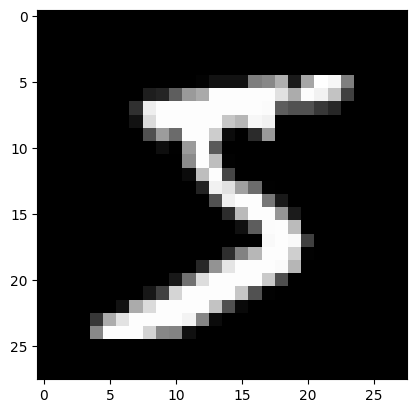

In [9]:
image,label=dataset[0]
print('image.shape',image.shape)
plt.imshow(image.permute(1,2,0),cmap='gray')
print('Label',label)

In [10]:
from typing_extensions import LiteralString
val_size=10000
train_size=len(dataset)-val_size

train_ds,val_ds=random_split(dataset,[train_size,val_size])
len(train_ds),len(val_ds)

(50000, 10000)

In [11]:
batch_size=128

In [13]:
train_loader=DataLoader(train_ds,batch_size,shuffle=True,num_workers=4,pin_memory=True)
val_loader=DataLoader(val_ds,batch_size*2,num_workers=4,pin_memory=True)

In [14]:
for images,_ in train_loader:
  print("images.shape",images.shape)
  print('grid.shape',make_grid(images,nrow=16).shape)
  break


images.shape torch.Size([128, 1, 28, 28])
grid.shape torch.Size([3, 242, 482])


images.shape torch.Size([128, 1, 28, 28])


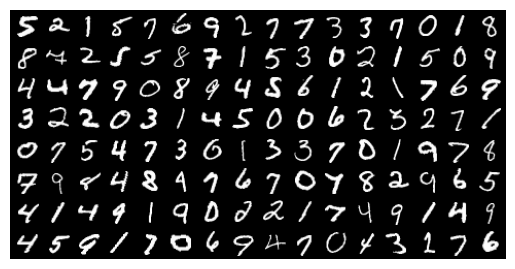

In [15]:
for images,_ in train_loader:
  print("images.shape",images.shape)
  plt.axis("off")
  plt.imshow(make_grid(images,nrow=16).permute((1,2,0)))
  break

In [16]:
for images ,labels in train_loader:
  print('images.shape',images.shape)
  inputs=images.reshape(-1,784)
  print('labels.shape',labels.shape)
  break

images.shape torch.Size([128, 1, 28, 28])
labels.shape torch.Size([128])


In [17]:
input_size=inputs.shape[-1]
hidden_size=32

In [18]:
layer1=nn.Linear(input_size,hidden_size)

In [19]:
inputs.shape

torch.Size([128, 784])

In [20]:
layer1_outputs=layer1(inputs)
print('Layer1_outputsL:',layer1_outputs.shape)

Layer1_outputsL: torch.Size([128, 32])


The image vectors of size 784 are transformed into intermediate output vectors of length 32 by performing a matrix multiplication of inputs matrix with the transposed weights matrix of layer1 and adding the bias. We can verify this using torch.allclose. For a more detailed explanation, review the tutorial on linear regression.

In [21]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape

torch.Size([128, 32])

In [22]:
torch.allclose(layer1_outputs, layer1_outputs_direct, 1e-3)

True

In [23]:
relu_outputs=F.relu(layer1_outputs)
print("relu output",relu_outputs.shape)
print("min(layer1_outputs)",torch.min(layer1_outputs).item())
print("min(relu_outputs)",torch.min(relu_outputs).item())

relu output torch.Size([128, 32])
min(layer1_outputs) -0.9245375394821167
min(relu_outputs) 0.0


In [24]:
output_size=10
layer2=nn.Linear(hidden_size,output_size)

In [25]:
relu_outputs.shape

torch.Size([128, 32])

In [26]:
layer2_outputs=layer2(relu_outputs)
print(layer2_outputs.shape)

torch.Size([128, 10])


In [27]:
inputs.shape

torch.Size([128, 784])

In [28]:
F.cross_entropy(layer2_outputs,labels)

tensor(2.3271, grad_fn=<NllLossBackward0>)

In [ ]:

outputs = (F.relu(inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias)

In [30]:
torch.allclose(outputs, layer2_outputs, 1e-3)


True

In [ ]:

outputs2 = (inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias


In [ ]:

combined_layer = nn.Linear(input_size, output_size)

combined_layer.weight.data = layer2.weight @ layer1.weight
combined_layer.bias.data = layer1.bias @ layer2.weight.t() + layer2.bias


In [ ]:

outputs3 = inputs @ combined_layer.weight.t() + combined_layer.bias


In [34]:
torch.allclose(outputs2, outputs3, 1e-3)


True

In [ ]:
class MnistModel(nn.Module):
    """Feedforward neural network with 1 hidden layer"""

    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        self.linear1 = nn.Linear(in_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, out_size)

    def forward(self, xb):
        
        xb = xb.view(xb.size(0), -1) 
        out = self.linear1(xb)
        out = F.relu(out)        
        out = self.linear2(out)
        return out

    def training_step(self, batch):
   
        images, labels = batch
        out = self(images)                    
        loss = F.cross_entropy(out, labels)   
        return loss
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                          
        loss = F.cross_entropy(out, labels)        
        acc = accuracy(out, labels)                 
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()     
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}


    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))



In [36]:
def accuracy(outputs,labels):
  _,preds=torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))


In [ ]:
input_size=784
hidden_size=32
num_classes=10

In [38]:
model=MnistModel(input_size,hidden_size,out_size=num_classes)

In [39]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [40]:
for images, labels in train_loader:
    outputs = model(images)

    break
loss = F.cross_entropy(outputs, labels)
print('Loss:', loss.item())
print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)


Loss: 2.3116159439086914
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-1.1847e-01, -7.5600e-03, -6.2726e-02, -1.6852e-01, -1.5065e-01,
         -9.1436e-02,  2.6858e-01, -6.1953e-02,  2.1898e-04,  3.3533e-02],
        [-2.2555e-01, -3.5707e-02, -6.2461e-02, -1.0390e-01, -1.6432e-01,
         -1.0712e-01,  1.3313e-01, -7.9027e-02, -1.5832e-02, -7.7702e-03]])


In [41]:
torch.cuda.is_available()

True

In [42]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')


In [43]:
device=get_default_device()
device

device(type='cuda')

In [ ]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)


In [45]:
for images, labels in train_loader:
    print(images.shape)
    print(images.device)
    images = to_device(images, device)
    print(images.device)
    break


torch.Size([128, 1, 28, 28])
cpu
cuda:0


Finally, we define a DeviceDataLoader class to wrap our existing data loaders and move batches of data to the selected device. Interestingly, we don't need to extend an existing class to create a PyTorch data loader.




All we need is an __iter__ method to retrieve batches of data and an __len__ method to get the number of batches.

In [46]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""

    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)


In [48]:
def some_numbers():
  yield 10
  yield 20
  yield 30

for value in some_numbers():
    print(value)

10
20
30


In [49]:
train_loader=DeviceDataLoader(train_loader,device)
val_loader=DeviceDataLoader(val_loader,device)

In [50]:
for xb,yb in val_loader:
  print("xb device",xb.device)
  print("yb",yb)
  break

xb device cuda:0
yb tensor([5, 5, 7, 4, 6, 2, 9, 7, 9, 5, 0, 4, 6, 2, 6, 3, 6, 5, 5, 1, 5, 0, 8, 3,
        7, 4, 3, 0, 2, 3, 6, 8, 0, 5, 0, 8, 6, 3, 4, 0, 4, 7, 7, 7, 9, 9, 6, 9,
        0, 0, 0, 5, 4, 0, 3, 8, 2, 0, 2, 3, 1, 6, 0, 0, 7, 9, 6, 6, 4, 2, 3, 7,
        0, 0, 1, 1, 0, 3, 4, 7, 4, 2, 3, 1, 7, 6, 5, 4, 5, 8, 2, 0, 3, 7, 5, 6,
        1, 5, 7, 1, 8, 2, 0, 9, 7, 5, 0, 7, 1, 7, 3, 3, 0, 7, 7, 7, 2, 2, 7, 0,
        6, 5, 5, 2, 1, 7, 2, 2, 3, 7, 3, 3, 2, 9, 5, 5, 1, 9, 4, 8, 2, 1, 7, 8,
        6, 0, 9, 1, 0, 6, 8, 4, 4, 2, 5, 6, 7, 3, 7, 3, 4, 4, 1, 8, 4, 7, 5, 6,
        6, 9, 2, 2, 6, 8, 4, 7, 8, 1, 1, 3, 7, 0, 4, 2, 6, 4, 5, 3, 7, 5, 5, 9,
        3, 5, 3, 2, 3, 2, 1, 2, 7, 0, 5, 3, 2, 6, 9, 3, 4, 6, 6, 9, 6, 6, 1, 7,
        0, 1, 8, 4, 2, 7, 1, 0, 2, 8, 8, 5, 2, 8, 3, 0, 1, 4, 5, 9, 2, 6, 1, 9,
        9, 8, 1, 5, 1, 0, 7, 4, 1, 5, 1, 5, 4, 0, 5, 9], device='cuda:0')


In [ ]:
 def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)

    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history


In [ ]:
model=MnistModel(input_size,hidden_size,out_size=num_classes)
to_device(model,device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
history=[evaluate(model,val_loader)]
history

[{'val_loss': 2.306513786315918, 'val_acc': 0.07138671725988388}]

In [54]:
history+=fit(5,0.5,model,train_loader,val_loader)

Epoch [0], val_loss: 0.2147, val_acc: 0.9387
Epoch [1], val_loss: 0.1753, val_acc: 0.9479
Epoch [2], val_loss: 0.1515, val_acc: 0.9558
Epoch [3], val_loss: 0.1501, val_acc: 0.9550
Epoch [4], val_loss: 0.1426, val_acc: 0.9561


In [55]:
history+=fit(5,0.1,model,train_loader,val_loader)

Epoch [0], val_loss: 0.1190, val_acc: 0.9644
Epoch [1], val_loss: 0.1164, val_acc: 0.9645
Epoch [2], val_loss: 0.1139, val_acc: 0.9663
Epoch [3], val_loss: 0.1145, val_acc: 0.9660
Epoch [4], val_loss: 0.1190, val_acc: 0.9647


Text(0.5, 1.0, 'Loss vs  No of Epoch ')

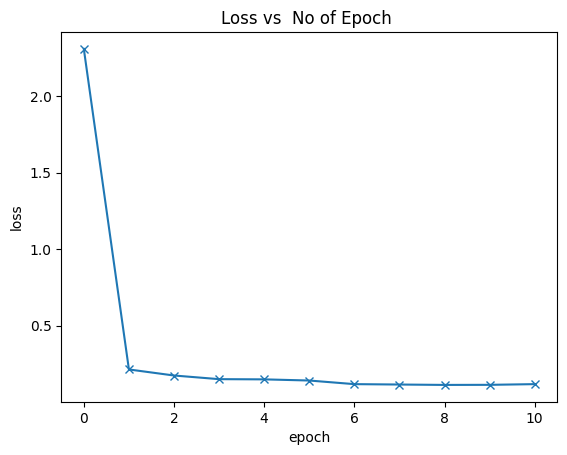

In [56]:
losses=[x['val_loss']for x in history]
plt.plot(losses,'-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs  No of Epoch ')

Text(0.5, 1.0, 'Accuracy vs  No of ')

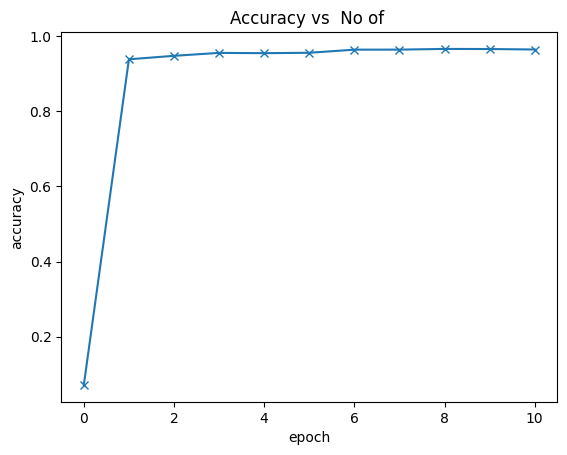

In [57]:
accuracies=[x['val_acc']for x in history]
plt.plot(accuracies,'-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs  No of ')

### Testing with individual images

In [58]:
test_dataset=MNIST(root='data/',train=False,transform=ToTensor())

In [59]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()


Label: 7 , Predicted: 7


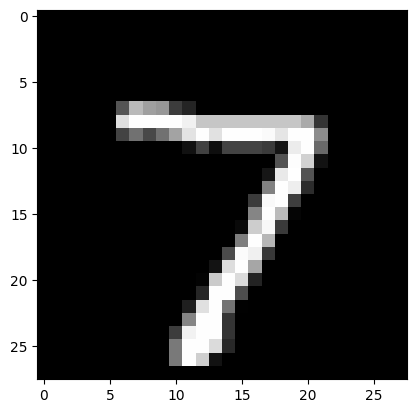

In [60]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))


Label: 2 , Predicted: 2


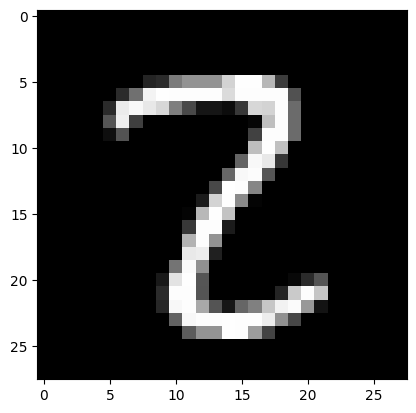

In [61]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))


Label: 9 , Predicted: 9


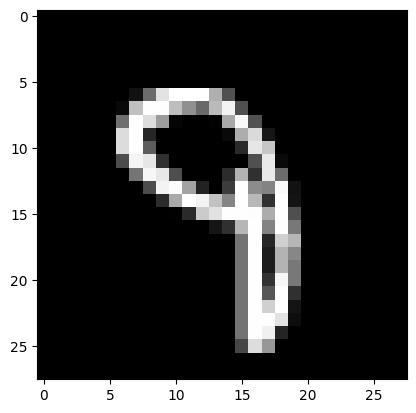

In [62]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))


Label: 7 , Predicted: 7


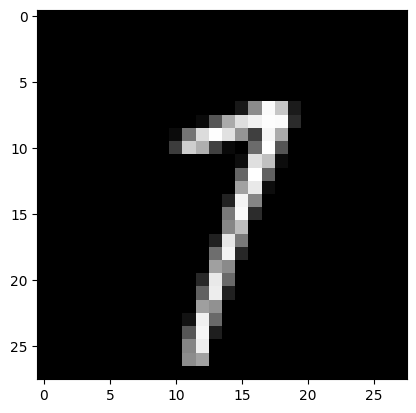

In [63]:
img, label = test_dataset[3213]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))


In [64]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=256), device)
result = evaluate(model, test_loader)
result


{'val_loss': 0.10731025040149689, 'val_acc': 0.967968761920929}

In [65]:
torch.save(model.state_dict(),'mnsit-feedforward.pth')